<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crear un dataframe

In [1]:
import pandas as pd

###Desde un arreglo de numpy

In [2]:
import numpy as np

###Desde un arreglo

In [3]:
datos=np.array([[11,12],
               [21,22]])
df=pd.DataFrame(data=datos,
                columns=['Col1','Col2'])
df

,Col1,Col2
0,11,12
1,21,22


###Desde un diccionario

In [4]:
datos={'Products':['Computer','Monitor','Printer','Desk'],
       'Prices':[1500,300,150,250]}
df=pd.DataFrame(datos)
df

,Products,Prices
0,Computer,1500
1,Monitor,300
2,Printer,150
3,Desk,250


In [5]:
datos={'Products':['Computer','Monitor','Printer','Desk'],
       'Prices':[1500,300,150,250]}
df=pd.DataFrame(datos['Prices'],columns=['Prices'],index=datos['Products'])
df

,Prices
Computer,1500
Monitor,300
Printer,150
Desk,250


###Desde el dataset de sklearn

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.to_csv('iris.csv',index=False)
df.to_excel('iris.xlsx',index=False)
df.to_json('iris.json')
df.to_pickle('iris.pickle')

datos=df.to_string()
archivo=open('iris.txt','w')
print(datos,file=archivo)
archivo.close()

###Desde un archivo csv

In [3]:
df=pd.read_csv('iris.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,SUM(EXH_CANT_N),VTANTA
0,1,"996,309",5,10/03/2021 00:00:00,3,1
1,1,"996,389",11,10/03/2021 00:00:00,30,0
2,1,"1,013,122",25,10/03/2021 00:00:00,1,1
3,1,"1,013,124",29,10/03/2021 00:00:00,2,0
4,1,"1,013,128",21,10/03/2021 00:00:00,2,0
...,...,...,...,...,...,...
4495707,109,"829,742",15,10/05/2021 00:00:00,2,0
4495708,109,"992,529",27,10/05/2021 00:00:00,2,0
4495709,109,"96,388",2,10/05/2021 00:00:00,3,0
4495710,109,"1,002,864",48,10/05/2021 00:00:00,6,0


####Guardar DS en base de datos

In [8]:
import sqlite3
conn=sqlite3.connect('bdd.db')

#cursor = conn.cursor()
#cursor.execute("DROP TABLE iris")
#print("Table dropped... ")
#conn.commit()

df.to_sql('iris',conn,index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
cursor = conn.cursor()
cursor.execute('Select * from iris')
rows = cursor.fetchall()

for row in rows:
    print(row)

###Desde un archivo Excel

In [11]:
df=pd.read_excel('iris.xlsx') #sheet_name=
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


###Desde una base de datos

In [10]:
import sqlite3
conn=sqlite3.connect('bdd.db')

In [12]:
df=pd.read_sql('Select * from iris',conn)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


##Desplegar informacion de un dataframe

###Dimension

In [4]:
df.shape

(4495712, 6)

In [5]:
df.columns

Index(['TI_CVE_N', 'ID_ART', 'TA_CVE_N', 'EXH_FEC_DT', 'SUM(EXH_CANT_N)',
       'VTANTA'],
      dtype='object')

In [15]:
print(df.size)
print(150*6)

900
900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495712 entries, 0 to 4495711
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TI_CVE_N         int64 
 1   ID_ART           object
 2   TA_CVE_N         object
 3   EXH_FEC_DT       object
 4   SUM(EXH_CANT_N)  object
 5   VTANTA           int64 
dtypes: int64(2), object(4)
memory usage: 205.8+ MB


In [7]:
df.values

array([[1, '996,309', 5, '10/03/2021 00:00:00', '3', 1],
       [1, '996,389', 11, '10/03/2021 00:00:00', '30', 0],
       [1, '1,013,122', 25, '10/03/2021 00:00:00', '1', 1],
       ...,
       [109, '96,388', 2, '10/05/2021 00:00:00', '3', 0],
       [109, '1,002,864', 48, '10/05/2021 00:00:00', '6', 0],
       [109, '1,007,111', 48, '10/05/2021 00:00:00', '15', 0]],
      dtype=object)

In [8]:
df.head()

,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,SUM(EXH_CANT_N),VTANTA
0,1,"996,309",5,10/03/2021 00:00:00,3,1
1,1,"996,389",11,10/03/2021 00:00:00,30,0
2,1,"1,013,122",25,10/03/2021 00:00:00,1,1
3,1,"1,013,124",29,10/03/2021 00:00:00,2,0
4,1,"1,013,128",21,10/03/2021 00:00:00,2,0


In [9]:
df.tail()

,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,SUM(EXH_CANT_N),VTANTA
4495707,109,"829,742",15,10/05/2021 00:00:00,2,0
4495708,109,"992,529",27,10/05/2021 00:00:00,2,0
4495709,109,"96,388",2,10/05/2021 00:00:00,3,0
4495710,109,"1,002,864",48,10/05/2021 00:00:00,6,0
4495711,109,"1,007,111",48,10/05/2021 00:00:00,15,0


In [10]:
df.sample(10)

,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,SUM(EXH_CANT_N),VTANTA
1545033,98,"990,466",26,10/05/2021 00:00:00,2,0
1743720,5,"157,451",24,10/04/2021 00:00:00,1,0
4084846,5,"996,915",5,10/03/2021 00:00:00,2,0
4447950,98,"926,256",26,10/04/2021 00:00:00,11,0
3532623,29,"829,288",26,10/03/2021 00:00:00,1,0
1865243,68,"1,011,350",26,10/03/2021 00:00:00,2,0
1488754,65,"832,622",7,10/04/2021 00:00:00,6,0
3923633,45,"831,430",25,10/05/2021 00:00:00,1,0
1660485,29,"873,643",5,10/05/2021 00:00:00,4,0
1382061,30,"992,972",24,10/05/2021 00:00:00,3,0


###Descripcion

In [11]:
df.describe()

,TI_CVE_N,VTANTA
count,4.495712e+06,4.495712e+06
mean,3.552992e+01,5.796746e-02
std,2.904752e+01,8.644672e-01
min,1.000000e+00,-4.000000e+00
25%,5.000000e+00,0.000000e+00
50%,3.000000e+01,0.000000e+00
75%,4.400000e+01,0.000000e+00
max,1.090000e+02,2.820000e+02


In [22]:
df['sepal length (cm)'].std()

0.8280661279778629

In [23]:
df['sepal length (cm)'].sum()

876.5

In [24]:
df.iloc[:,0].mode()

0    5.0
dtype: float64

In [25]:
df.iloc[:,0].mean()

5.843333333333335

###Mostrar columnas

In [27]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [28]:
df.columns[[0,1]]

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

In [29]:
df[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [26]:
df.iloc[:].var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

###Renombrar columnas

In [16]:
newcols={
    "sepal length (cm)":"SepaloLongitud",
    "sepal width (cm)":"SepaloAncho"}

df.rename(columns=newcols,inplace=True)
df

,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,Existencia,VTANTA
0,1,"996,309",5,10/03/2021 00:00:00,3,1
1,1,"996,389",11,10/03/2021 00:00:00,30,0
2,1,"1,013,122",25,10/03/2021 00:00:00,1,1
3,1,"1,013,124",29,10/03/2021 00:00:00,2,0
4,1,"1,013,128",21,10/03/2021 00:00:00,2,0
...,...,...,...,...,...,...
4495707,109,"829,742",15,10/05/2021 00:00:00,2,0
4495708,109,"992,529",27,10/05/2021 00:00:00,2,0
4495709,109,"96,388",2,10/05/2021 00:00:00,3,0
4495710,109,"1,002,864",48,10/05/2021 00:00:00,6,0


In [31]:
newcols={
    "SepaloLongitud":"sepal length (cm)",
    "SepaloAncho":"sepal width (cm)"}
 
df.rename(columns=newcols,inplace=True)
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa


###Filtrar renglones

In [ ]:
df[df['species']=='setosa']

In [ ]:
df[(df['species']=='setosa') & (df['sepal length (cm)']>5)] 

In [ ]:
df[(df['species']=='setosa') & (df['sepal length (cm)']>5)]['sepal length (cm)']

In [37]:
df[(df['species']=='setosa') & (df['sepal length (cm)']>5)]['sepal length (cm)'].mean()

5.3136363636363635

In [38]:
df.iloc[0]

sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.2
target                    0
species              setosa
Name: 0, dtype: object

In [39]:
df.loc[0]

sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.2
target                    0
species              setosa
Name: 0, dtype: object

In [40]:
df.iloc[0:10,1:3]

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7
6,3.4,1.4
7,3.4,1.5
8,2.9,1.4
9,3.1,1.5


In [41]:
df.loc[[7,10,30]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
7,5.0,3.4,1.5,0.2,0.0,setosa
10,5.4,3.7,1.5,0.2,0.0,setosa
30,4.8,3.1,1.6,0.2,0.0,setosa


###Ordenar renglones

In [42]:
df.sort_values(by=['species','sepal length (cm)'],inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
13,4.3,3.0,1.1,0.1,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
38,4.4,3.0,1.3,0.2,0.0,setosa
42,4.4,3.2,1.3,0.2,0.0,setosa
41,4.5,2.3,1.3,0.3,0.0,setosa
...,...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,2.0,virginica
118,7.7,2.6,6.9,2.3,2.0,virginica
122,7.7,2.8,6.7,2.0,2.0,virginica
135,7.7,3.0,6.1,2.3,2.0,virginica


###Marca los valores maximos por columna

In [ ]:
df.head(10).style.highlight_max(color='lightgreen', axis=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0.000000,setosa
1,4.900000,3.000000,1.400000,0.200000,0.000000,setosa
2,4.700000,3.200000,1.300000,0.200000,0.000000,setosa
3,4.600000,3.100000,1.500000,0.200000,0.000000,setosa
4,5.000000,3.600000,1.400000,0.200000,0.000000,setosa
5,5.400000,3.900000,1.700000,0.400000,0.000000,setosa
6,4.600000,3.400000,1.400000,0.300000,0.000000,setosa
7,5.000000,3.400000,1.500000,0.200000,0.000000,setosa
8,4.400000,2.900000,1.400000,0.200000,0.000000,setosa
9,4.900000,3.100000,1.500000,0.100000,0.000000,setosa


###Marca los valores maximos por renglon

In [ ]:
df.head(10).style.highlight_max(color='lightgreen', axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0.000000,setosa
1,4.900000,3.000000,1.400000,0.200000,0.000000,setosa
2,4.700000,3.200000,1.300000,0.200000,0.000000,setosa
3,4.600000,3.100000,1.500000,0.200000,0.000000,setosa
4,5.000000,3.600000,1.400000,0.200000,0.000000,setosa
5,5.400000,3.900000,1.700000,0.400000,0.000000,setosa
6,4.600000,3.400000,1.400000,0.300000,0.000000,setosa
7,5.000000,3.400000,1.500000,0.200000,0.000000,setosa
8,4.400000,2.900000,1.400000,0.200000,0.000000,setosa
9,4.900000,3.100000,1.500000,0.100000,0.000000,setosa


###Marca los valores maximos por todo el dataframe

In [ ]:
df.head(10).style.highlight_max(color='lightgreen', axis=None)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0.000000,setosa
1,4.900000,3.000000,1.400000,0.200000,0.000000,setosa
2,4.700000,3.200000,1.300000,0.200000,0.000000,setosa
3,4.600000,3.100000,1.500000,0.200000,0.000000,setosa
4,5.000000,3.600000,1.400000,0.200000,0.000000,setosa
5,5.400000,3.900000,1.700000,0.400000,0.000000,setosa
6,4.600000,3.400000,1.400000,0.300000,0.000000,setosa
7,5.000000,3.400000,1.500000,0.200000,0.000000,setosa
8,4.400000,2.900000,1.400000,0.200000,0.000000,setosa
9,4.900000,3.100000,1.500000,0.100000,0.000000,setosa


###Agregar renglones

In [43]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [1]:
import pandas as pd
df=pd.read_csv('iris.csv')
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


In [45]:
df2=pd.DataFrame([[1,2,3,4,0.0,'otra']],columns=df.columns)
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,1,2,3,4,0.0,otra


In [4]:
#Genera 3'000,000 de registros
for _ in range(20000):
  df2=df2.append(df,ignore_index=True)


In [9]:
df2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500300e+06,1.500300e+06,1.500300e+06,1.500300e+06,1.500300e+06
mean,5.843333e+00,3.057333e+00,3.758000e+00,1.199333e+00,1.000000e+00
std,8.253016e-01,4.344111e-01,1.759405e+00,7.596929e-01,8.164969e-01
min,4.300000e+00,2.000000e+00,1.000000e+00,1.000000e-01,0.000000e+00
25%,5.100000e+00,2.800000e+00,1.600000e+00,3.000000e-01,0.000000e+00
50%,5.800000e+00,3.000000e+00,4.350000e+00,1.300000e+00,1.000000e+00
75%,6.400000e+00,3.300000e+00,5.100000e+00,1.800000e+00,2.000000e+00
max,7.900000e+00,4.400000e+00,6.900000e+00,2.500000e+00,2.000000e+00


###Borrar renglones

In [ ]:
index_names=df[df['species']=='otra'].index
index_names

Int64Index([150, 151, 152, 153], dtype='int64')

In [ ]:
df.drop(index_names,inplace=True)
df[df['species']=='otra']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species


###Limpieza de datos nulos

In [ ]:
df.loc[0:3,'species']=np.nan
df.loc[2:10,'petal width (cm)']=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   141 non-null    float64 
 4   target             150 non-null    float64 
 5   species            146 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.2 KB


###Contar nulos

In [ ]:
df['species'].isna().sum()

4

In [18]:
df.isna().sum().sum()

0

###Eliminar registros nulos

In [11]:
df.dropna(inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
1500295,6.7,3.0,5.2,2.3,2.0,virginica
1500296,6.3,2.5,5.0,1.9,2.0,virginica
1500297,6.5,3.0,5.2,2.0,2.0,virginica
1500298,6.2,3.4,5.4,2.3,2.0,virginica


###Sustituir valores nulos con un valor por defecto

In [ ]:
df.loc[14:16,'petal width (cm)']=np.nan
df.loc[16:18,'petal length (cm)']=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 11 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  139 non-null    float64 
 1   sepal width (cm)   139 non-null    float64 
 2   petal length (cm)  136 non-null    float64 
 3   petal width (cm)   136 non-null    float64 
 4   target             139 non-null    float64 
 5   species            139 non-null    category
dtypes: category(1), float64(5)
memory usage: 11.8 KB


In [ ]:
df.fillna(0,inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
4,5.0,3.6,1.4,0.0,0.0,setosa
5,5.4,3.9,1.7,0.0,0.0,setosa
6,4.6,3.4,0.0,0.0,0.0,setosa
7,5.0,3.4,0.0,0.2,0.0,setosa
8,4.4,2.9,0.0,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
df.loc[4:6,'petal width (cm)']=np.nan
df.loc[6:8,'petal length (cm)']=np.nan

df['petal width (cm)'].fillna(0,inplace=True)
df['petal length (cm)'].fillna(1,inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
4,5.0,3.6,1.4,0.0,0.0,setosa
5,5.4,3.9,1.7,0.0,0.0,setosa
6,4.6,3.4,1.0,0.0,0.0,setosa
7,5.0,3.4,1.0,0.2,0.0,setosa
8,4.4,2.9,1.0,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
df.loc[4:6,'petal width (cm)']=np.nan
df.loc[6:8,'petal length (cm)']=np.nan

df['petal width (cm)'].fillna(df['petal width (cm)'].mean(),inplace=True)
df['petal length (cm)'].fillna(df['petal length (cm)'].median(),inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
4,5.0,3.6,1.4,1.246154,0.0,setosa
5,5.4,3.9,1.7,1.246154,0.0,setosa
6,4.6,3.4,4.4,1.246154,0.0,setosa
7,5.0,3.4,4.4,0.200000,0.0,setosa
8,4.4,2.9,4.4,0.200000,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.300000,2.0,virginica
146,6.3,2.5,5.0,1.900000,2.0,virginica
147,6.5,3.0,5.2,2.000000,2.0,virginica
148,6.2,3.4,5.4,2.300000,2.0,virginica


###Calcular valores nulos con una interpolación

In [19]:
df.loc[4:6,'petal width (cm)']=np.nan
df.loc[6:8,'petal length (cm)']=np.nan

df['petal width (cm)'].interpolate(method='quadratic', limit_direction='forward',inplace=True)
df['petal length (cm)'].interpolate(method='nearest', limit_direction='forward',inplace=True)

df.loc[3:9]

,TI_CVE_N,ID_ART,TA_CVE_N,EXH_FEC_DT,Existencia,VTANTA,petal width (cm),petal length (cm)
3,1,"1,013,124",29,10/03/2021 00:00:00,2,0,NaN,NaN
4,1,"1,013,128",21,10/03/2021 00:00:00,2,0,NaN,NaN
5,1,"1,001,841",26,10/03/2021 00:00:00,2,0,NaN,NaN
6,1,"1,001,846",26,10/03/2021 00:00:00,1,0,NaN,NaN
7,1,"992,771",18,10/03/2021 00:00:00,24,1,NaN,NaN
8,1,"992,777",24,10/03/2021 00:00:00,6,0,NaN,NaN
9,1,"997,853",24,10/03/2021 00:00:00,9,0,NaN,NaN


##Graficos

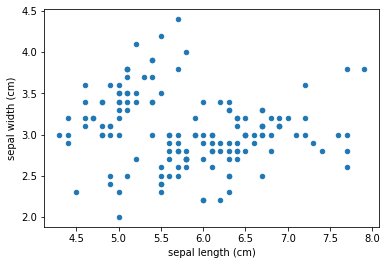

In [3]:
df.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)');

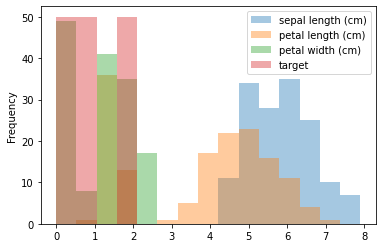

In [16]:
df.plot(kind='hist',x='sepal width (cm)',bins=15,alpha=0.4);

Generate Kernel Density Estimate plot using Gaussian kernels.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

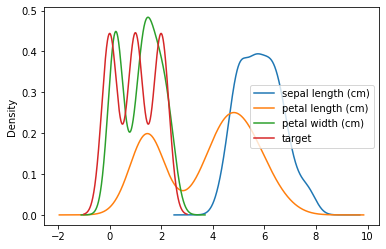

In [3]:
df.plot(kind='kde',x='sepal width (cm)');

In [47]:
x=[1,2,3,4,5]
y=[2,5,1,3,8]
z=["rojo","blanco","azul","verde","magenta"]
df2=pd.DataFrame(data={"x":x,"y":y},index=z)

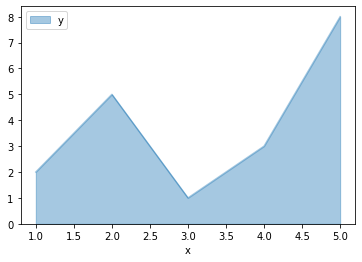

In [48]:
df2.plot(kind='area',x='x',y='y',alpha=0.4);

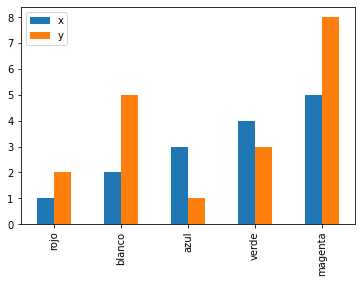

In [49]:
df2.plot.bar();

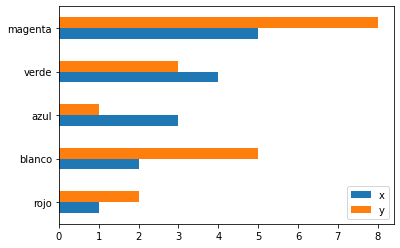

In [50]:
df2.plot.barh();

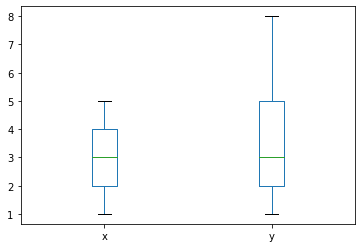

In [51]:
df2.plot(kind='box');

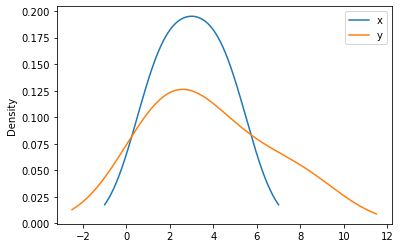

In [52]:
df2.plot(kind='density');

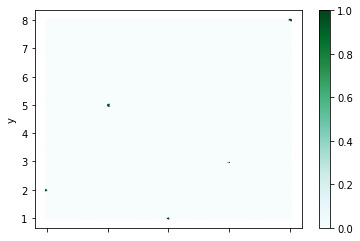

In [53]:
df2.plot(kind='hexbin',x='x',y='y');

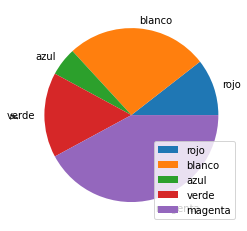

In [55]:
df2.plot(kind='pie',y='y');

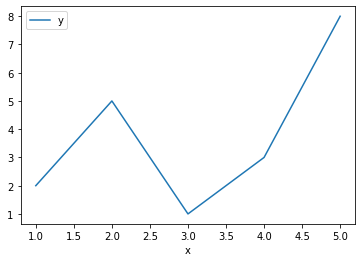

In [56]:
df2.plot(kind='line',x='x',y='y');

###SeaBorn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

###scatter histogramas

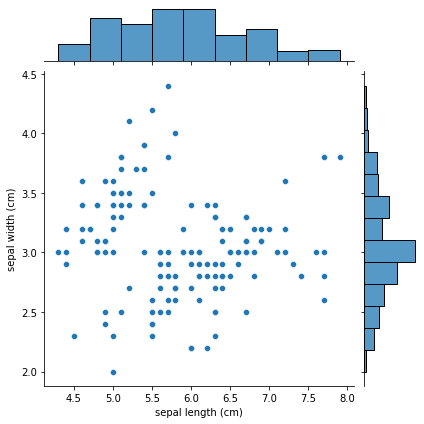

In [ ]:
sns.jointplot(data=df,x='sepal length (cm)',y='sepal width (cm)');

###Facetgrid

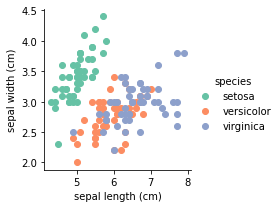

In [ ]:
sns.FacetGrid(df,hue='species',palette='Set2').map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend();

###Box

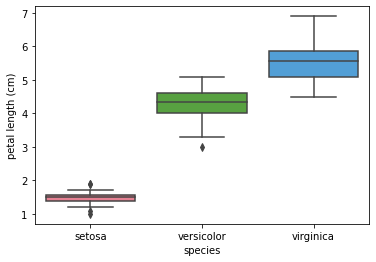

In [ ]:
sns.boxplot(data=df,x='species',y='petal length (cm)',palette='husl');

###Violin

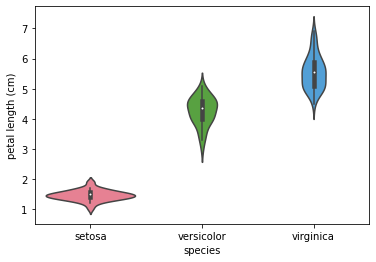

In [ ]:
sns.violinplot(data=df,x='species',y='petal length (cm)',palette='husl');

###Correlacion

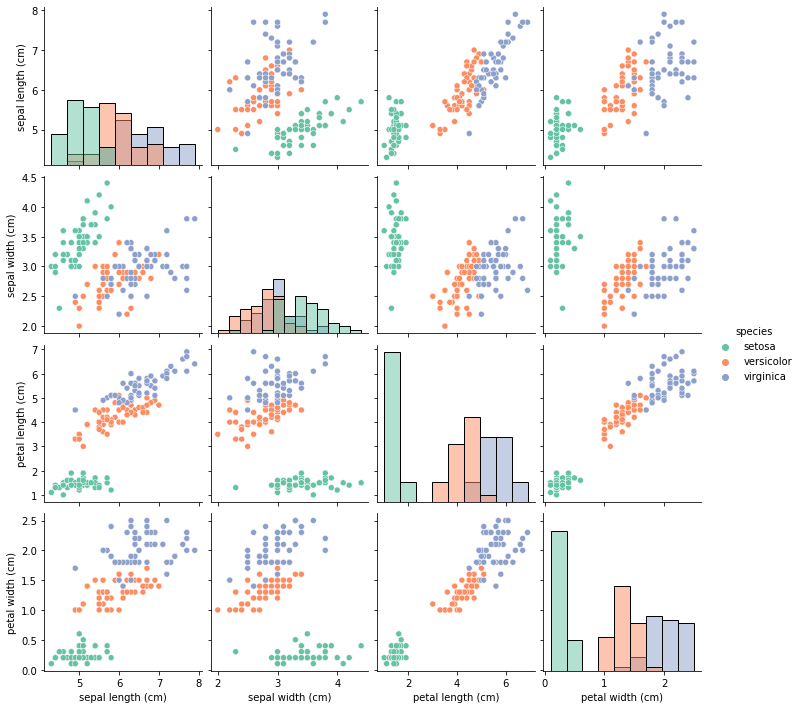

In [ ]:
sns.pairplot(df.drop('target',axis=1),hue='species',palette='Set2',diag_kind='hist');

###Correlacion cajas

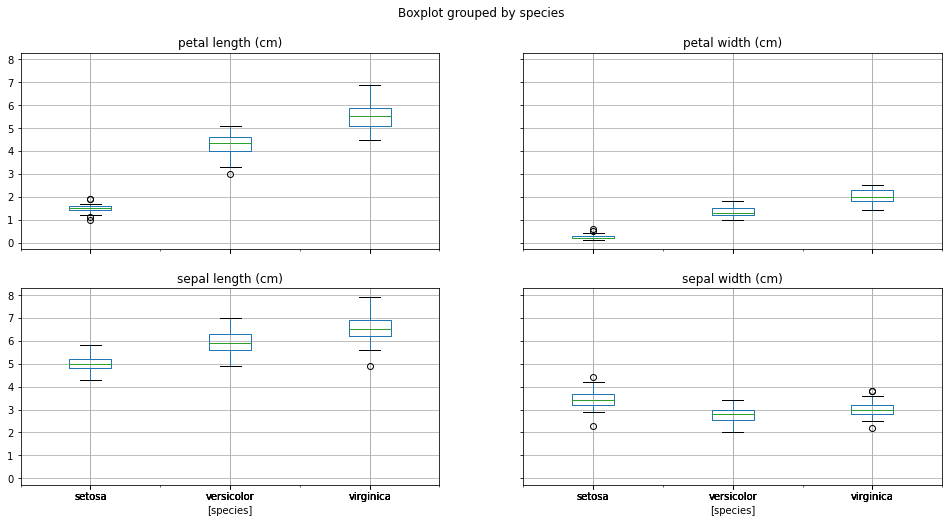

In [ ]:
df.drop('target',axis=1).boxplot(by='species',figsize=(16,8));

###Curvas de Andrews

In [ ]:
from pandas.plotting import andrews_curves

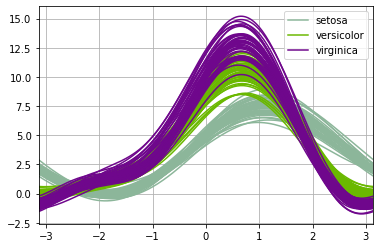

In [ ]:
andrews_curves(df.drop('target',axis=1),'species');

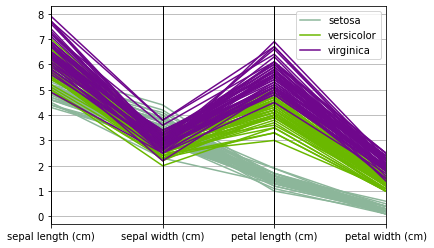

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop('target',axis=1),'species');

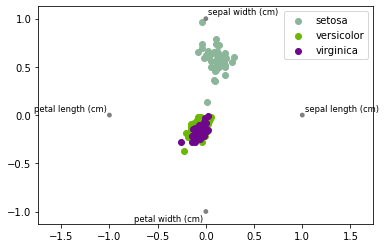

In [ ]:
from pandas.plotting import radviz
radviz(df.drop('target',axis=1),'species');

In [16]:
df.drop('petal area',axis=1,inplace=True)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

##Correlación

El método corr() genera una tabla con muchos números que representa qué tan bien está la relación entre dos columnas.

El número varía de -1 a 1.

1 significa que hay una relación de 1 a 1 (una correlación perfecta), y para este conjunto de datos, cada vez que un valor subió en la primera columna, la otra subió también.

0.9 también es una buena relación, y si aumenta un valor, el otro probablemente también lo hará.

-0,9 sería una relación tan buena como 0,9, pero si aumenta un valor, el otro probablemente bajará.

0.2 significa NO una buena relación, lo que significa que si un valor aumenta no significa que el otro lo hará.

¿Qué es una buena correlación? Depende del uso, pero creo que es seguro decir que debe tener al menos 0.6(o -0.6) para llamarlo una buena correlación.


In [20]:
df.corr()

,TI_CVE_N,VTANTA,petal width (cm),petal length (cm)
TI_CVE_N,1.00000,-0.00108,NaN,NaN
VTANTA,-0.00108,1.00000,NaN,NaN
petal width (cm),NaN,NaN,NaN,NaN
petal length (cm),NaN,NaN,NaN,NaN


##Calculos

###Entre columnas

In [15]:
df['petal area']=df['petal length (cm)']*df['petal width (cm)']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,petal area
0,5.1,3.5,1.4,0.2,0.0,setosa,0.28
1,4.9,3.0,1.4,0.2,0.0,setosa,0.28
2,4.7,3.2,1.3,0.2,0.0,setosa,0.26
3,4.6,3.1,1.5,0.2,0.0,setosa,0.30
4,5.0,3.6,1.4,0.2,0.0,setosa,0.28
...,...,...,...,...,...,...,...
1500295,6.7,3.0,5.2,2.3,2.0,virginica,11.96
1500296,6.3,2.5,5.0,1.9,2.0,virginica,9.50
1500297,6.5,3.0,5.2,2.0,2.0,virginica,10.40
1500298,6.2,3.4,5.4,2.3,2.0,virginica,12.42
